In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [2]:
read_csv = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates = ['Date'])
read_csv.head(5)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df = read_csv[read_csv['Date'] > '2020-03-15']
countries = ['India', 'United Kingdom', 'Italy', 'Spain', 'China']
df = df[df['Country'].isin(countries)]
df.head(5)

,Date,Country,Confirmed,Recovered,Deaths
10134,2020-03-16,China,81033,67910,3217
10177,2020-03-16,India,119,13,2
10183,2020-03-16,Italy,27980,2749,2158
10255,2020-03-16,Spain,9942,530,342
10275,2020-03-16,United Kingdom,1551,21,66


In [4]:
df['Total_Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head(5)

,Date,Country,Confirmed,Recovered,Deaths,Total_Cases
10134,2020-03-16,China,81033,67910,3217,152160
10177,2020-03-16,India,119,13,2,134
10183,2020-03-16,Italy,27980,2749,2158,32887
10255,2020-03-16,Spain,9942,530,342,10814
10275,2020-03-16,United Kingdom,1551,21,66,1638


In [5]:
colors = {'United Kingdom':'#045275', 'China':'#089099', 'India':'#7CCBA2', 'Italy':'#FCDE9C', 'Spain':'#DC3977'}
plt.style.use('fivethirtyeight')

In [6]:
df1 = df[['Date','Country','Confirmed','Recovered', 'Deaths']]
df1.head(5)

,Date,Country,Confirmed,Recovered,Deaths
10134,2020-03-16,China,81033,67910,3217
10177,2020-03-16,India,119,13,2
10183,2020-03-16,Italy,27980,2749,2158
10255,2020-03-16,Spain,9942,530,342
10275,2020-03-16,United Kingdom,1551,21,66


In [7]:
df1 = df1.pivot(index='Date', columns='Country', values='Confirmed')
df1.head(5)

Country,China,India,Italy,Spain,United Kingdom
Date,,,,,
2020-03-16,81033,119,27980,9942,1551
2020-03-17,81058,142,31506,11748,1960
2020-03-18,81102,156,35713,13910,2642
2020-03-19,81156,194,41035,17963,2716
2020-03-20,81250,244,47021,20410,4014


In [8]:
countries_list=list(df1.columns)
# print(countries_list)
countries=list(df1.columns)
df2 = df1.reset_index('Date')
df2.set_index(['Date'], inplace=True)
df2.columns = countries
df2.head(5)

,China,India,Italy,Spain,United Kingdom
Date,,,,,
2020-03-16,81033,119,27980,9942,1551
2020-03-17,81058,142,31506,11748,1960
2020-03-18,81102,156,35713,13910,2642
2020-03-19,81156,194,41035,17963,2716
2020-03-20,81250,244,47021,20410,4014


# Number of Confirmed Cases since 15th March 2020 of 5 countries: China, India, Italy, Spain, UK

Text(0, 0.5, 'No. of confirmed cases')

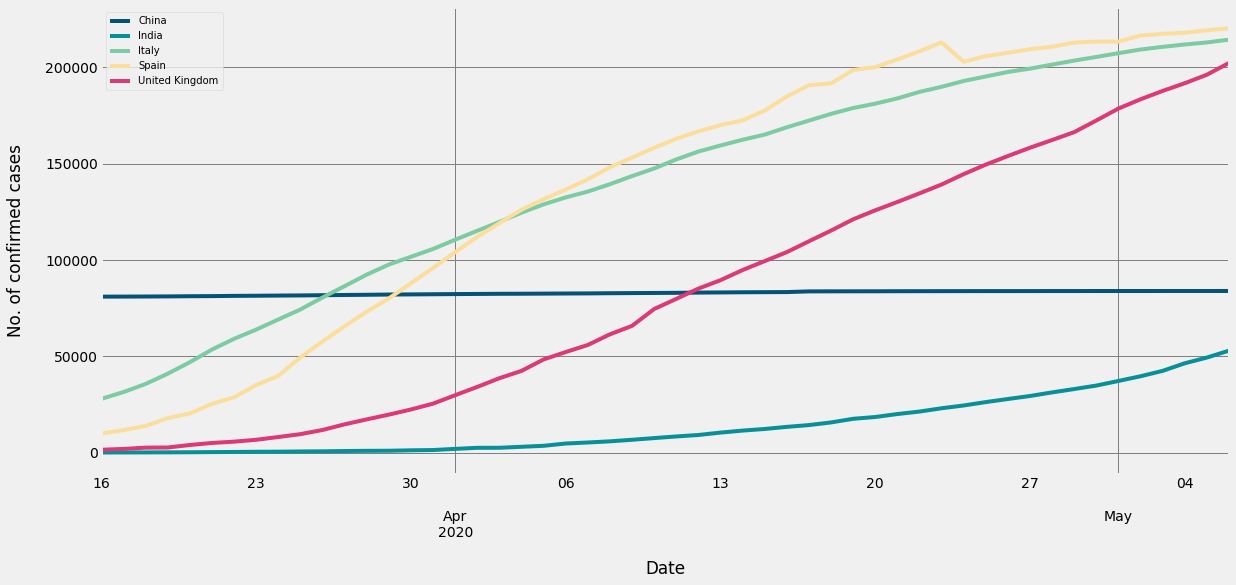

In [9]:
df2.plot(figsize=(18,8), color=list(colors.values()), legend=True)
# plt.yaxis.set_major_formatter(tick.StrMethodFormatter('{y:,.0f}'))
plt.legend(loc=2, prop={'size': 10})
plt.grid(color='gray')
plt.xlabel('Date', labelpad=20)
plt.ylabel('No. of confirmed cases', labelpad=20)

In [10]:
death_rate = df[['Date','Country','Deaths']]
death_rate=death_rate[death_rate['Country']=='India']
death_rate.head(5)

,Date,Country,Deaths
10177,2020-03-16,India,2
10364,2020-03-17,India,3
10551,2020-03-18,India,3
10738,2020-03-19,India,4
10925,2020-03-20,India,5


# India Death Rate

Text(0, 0.5, 'Total Deaths')

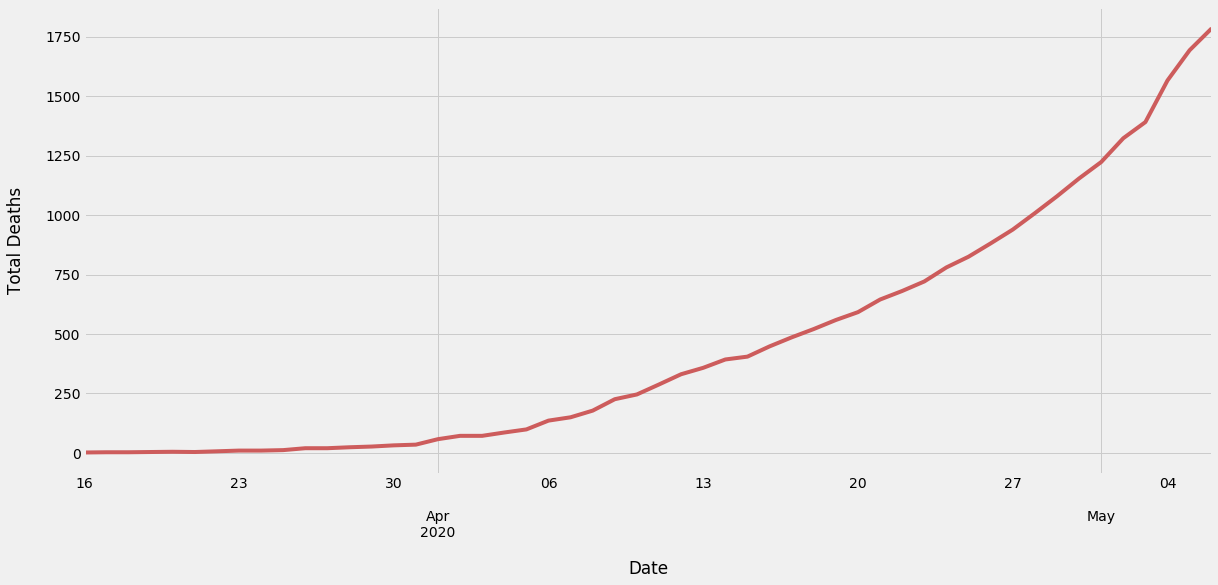

In [11]:
death_rate.plot(figsize=(18,8),x='Date', y='Deaths', kind='line', color='indianred', legend=False)
plt.xlabel('Date', labelpad=20)
plt.ylabel('Total Deaths', labelpad=20)

 # India recovery rate date wise

In [12]:
recovery_rate = df[['Date','Country','Recovered']]
recovery_rate = recovery_rate[df['Country']=='India']
recovery_rate.head(5)

,Date,Country,Recovered
10177,2020-03-16,India,13
10364,2020-03-17,India,14
10551,2020-03-18,India,14
10738,2020-03-19,India,15
10925,2020-03-20,India,20


Text(0, 0.5, 'Count')

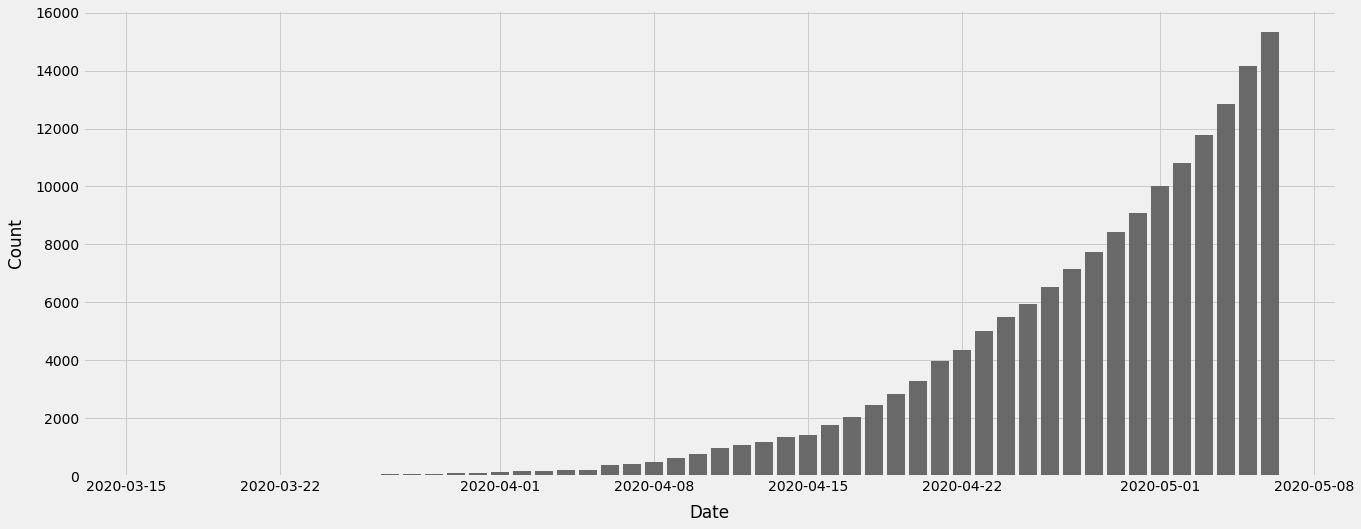

In [13]:
r_date=list(recovery_rate['Date'])
r_count = list(recovery_rate['Recovered'])
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(r_date,r_count,color='dimgray')
plt.xlabel('Date', labelpad=10)
plt.ylabel('Count', labelpad=10)

# India Recovery vs Death rate

In [14]:
rec_death = df[['Date','Country','Recovered','Deaths']]
rec_death = rec_death[rec_death['Country']=='India']

Text(0, 0.5, 'Total Count')

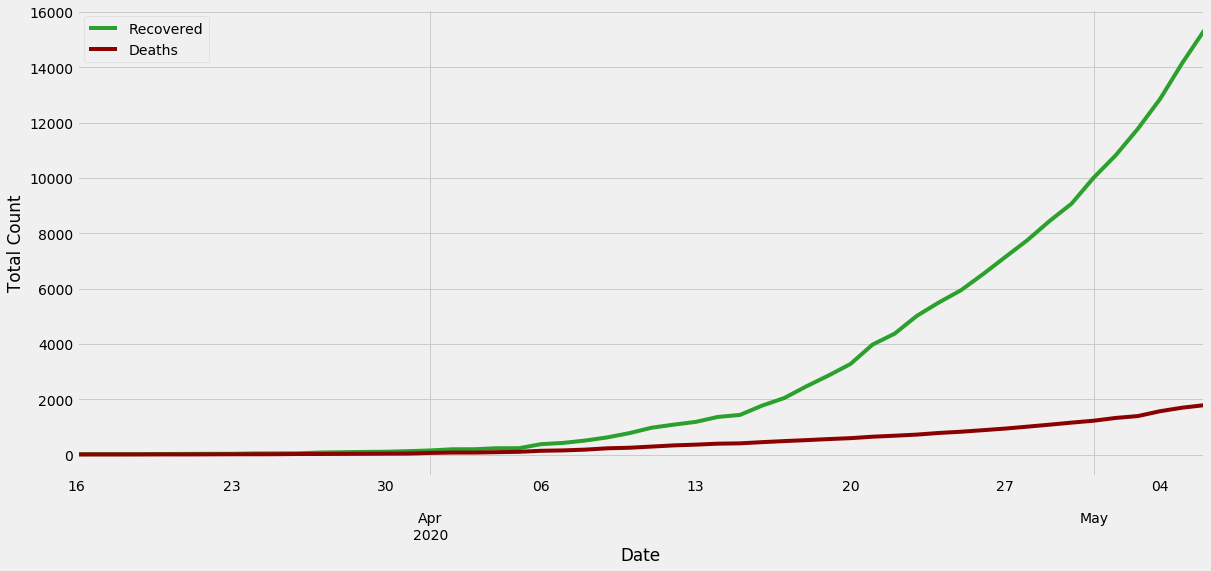

In [15]:
colors = ['tab:green', 'darkred']
rec_death.plot(figsize=(18,8),x='Date', y=['Recovered', 'Deaths'], kind='line', color=colors)
plt.xlabel('Date')
plt.ylabel('Total Count')

In [16]:
daily_cases = df[['Date', 'Country', 'Confirmed']]
daily_cases = daily_cases[daily_cases['Country'] == 'India']
daily_cases['Daily_New_Cases'] = daily_cases['Confirmed'].diff()
daily_cases.head(5)

,Date,Country,Confirmed,Daily_New_Cases
10177,2020-03-16,India,119,NaN
10364,2020-03-17,India,142,23.0
10551,2020-03-18,India,156,14.0
10738,2020-03-19,India,194,38.0
10925,2020-03-20,India,244,50.0


Text(0, 0.5, 'Daily New Cases')

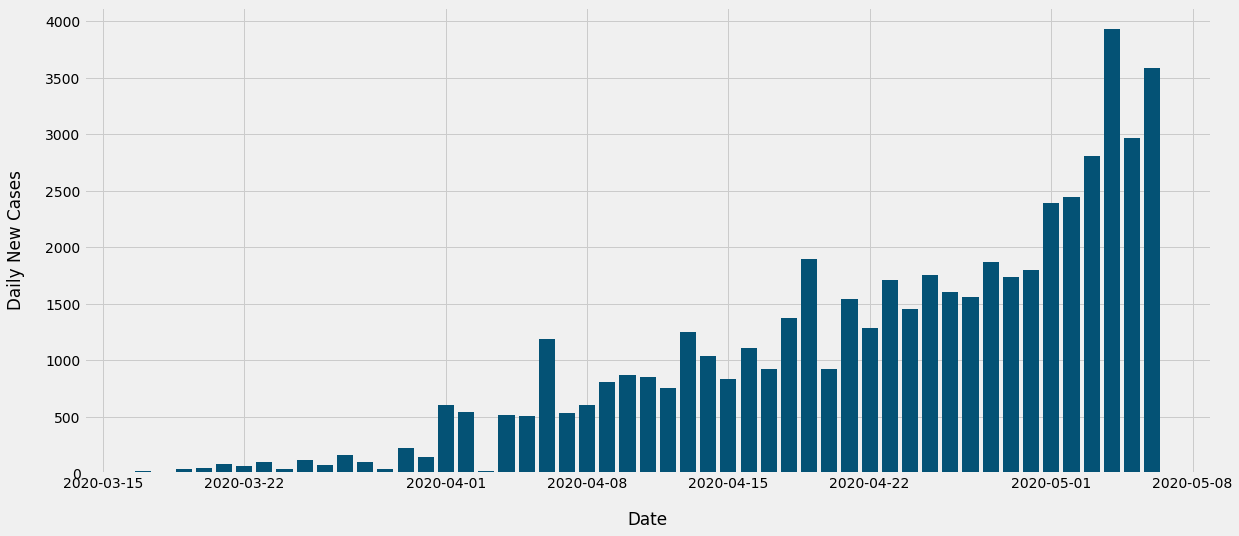

In [17]:
cases_date=list(daily_cases['Date'])
cases_count = list(daily_cases['Daily_New_Cases'])
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(cases_date,cases_count,color='#045275')
plt.xlabel('Date', labelpad=20)
plt.ylabel('Daily New Cases', labelpad=20)